<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/16-Maquinas_de_Vectores_de_Soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

# Máquinas de Vectores de Soporte

Consideremos nuevamente el problema de clasificación biclase a partir de un modelo lineal:

$$y({\bf{x}}) = {\bf{w}}^T \phi({\bf{x}}) + b$$

El conjunto de entrenamiento consta de $N$ pares $({\bf{x}}_i,t_i)$, donde $t_i \in \{-1,1\}$ y las muestras nuevas son clasificadas con respecto al signo de $y({\bf{x}})$.   

Supongamos que el problema es linealmente separable, es decir que las muestras de las dos clases están completamente separadas en el espacio de características:

In [1]:
%matplotlib inline

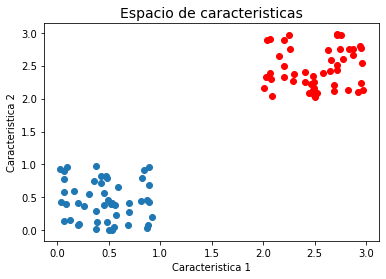

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.rand(2,50)
x2 = np.random.rand(2,50) + 2
plt.title('Espacio de caracteristicas', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(x1[0,:], x1[1,:])
plt.scatter(x2[0,:], x2[1,:],color='red')
plt.show()

Podemos encontrar muchas fronteras diferentes que separan perfectamente las dos clases. Si utilizamos el criterio de minimizar el error de clasificación vamos a encontrar alguna solución que satisface el criterio:

[[-2.83891393]
 [-3.51114846]
 [ 8.95819247]]


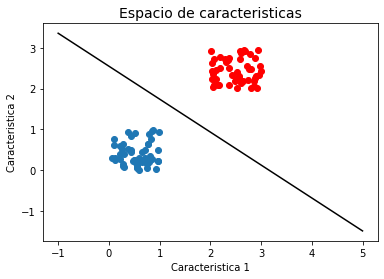

In [3]:
import local.lib.svmclass as sv
sv.DecisionBoundaryPlot()

Sin embargo podríamos tener muchas otras fronteras, la pregunta que surge es <b>¿cuál de todas las posibles soluciones es la mejor?</b>

Las Máquinas de Soporte Vectorial (En inglés <b> Support Vector Machines) </b>) son un tipo de modelos de aprendizaje que permiten encontrar la mejor solución utilizando como criterio de ajuste la máximización del márgen, entendiendo márgen como la distancia más corta entre la frontera de decisión y cualquiera de las muestras.

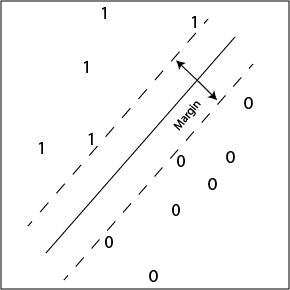

In [4]:
from IPython.display import Image
Image("local/imgs/Margin.png", width = 400, height = 200)

Recordemos cómo se mide la distancia de un punto a un plano:

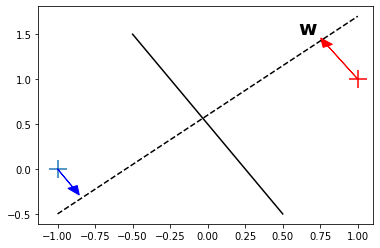

In [5]:
x1 = -1, 0
x2 = 1, 1
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-.5,.5], [1.5,-.5], 'k-')
plt.plot([-1, 1], [-.5, 1.7], 'k--')
plt.annotate(r"$\bf{w}$", xy=(0.6, 1.5), fontsize=20)
plt.arrow(-1, 0, .1, -.2, fc="b", ec="b", head_width=0.07, head_length=0.1)
plt.arrow(1, 1, -.2, .37, fc="r", ec="r", head_width=0.07, head_length=0.1)

Teniendo en cuenta que la distancia perpendicular de un punto $\bf{x}$ a un hiperplano definido por $y({\bf{x}}) = 0$ está dado por $|y({\bf{x}})|/\|{\bf{w}}\|$. 

Sin embargo, si asumimos que todas las muestras están correctamente clasificadas, es decir, si $t_n = -1$ entonces $y({\bf{x}}_n)<0$ y  si $t_n=1$ entonce $y({\bf{x}}_n) > 0$. Por lo tanto, en una solución en la que todos los puntos se encuentran bien clasificados se cumplirá que $t_n y({\bf{x}}_n) > 0 \;\; \forall \;\; ({\bf{x}}_n, t_n)$.

Si asumimos entonces que todas las muestras están correctamente clasificadas, la distancia entre todos las muestras y la frontera de decisión estará dada por:

$$\frac{t_n y({\bf{x}}_n)}{\|{\bf{w}}\|}=\frac{t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b)}{\|{\bf{w}}\|}$$

Por lo tanto la solución de **máximo margen** se encuentra resolviendo:

$$ \mathop {\arg \max }\limits_{{\bf{w}},b} \left\lbrace \frac{1}{\|{\bf{w}}\|} \min\limits_n \left[ t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b) \right] \right\rbrace $$

Aunque la función anterior corresponde a un criterio de entrenamiento de maximización del márgen, el proceso de optimización allí planteado es muy complejo. Por esa razón se debe encontrar una formulación alternativa.

Teniendo en cuenta que si se reescala el vector $\bf{w}$ como $k{\bf{w}}$ y $b \rightarrow kb$, siendo $k$ un valor real, la distancia $\frac{t_n y({\bf{x}}_n)}{\|{\bf{w}}\|}$ sigue sin cambiar, se puede asumir que para el punto más cercano a la superficie $ t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b)=1$ por consiguiente todos los puntos cumplirán la condición: 

$$t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b) \geq 1, \;\; n=1,...,N$$

Entonces el término a minimizar en la función criterio anterior es igual a 1, por lo tanto ahora sólo se requiere maximizar $\frac{1}{\|{\bf{w}}\|}$ o lo que es equivalente minimizar $\|{\bf{w}}\|^2$. Usando los resultados anteriores la función de costo se puede escribir como:

$$ \mathop {\arg \min }\limits_{{\bf{w}},b} \frac{1}{2} \|{\bf{w}}\|^2 \;\; \text{Sujeto a} \;\;t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b) \geq 1$$

### Formulación primal

Minimizar una función cuadrática sujeta a un conjunto de restricciones lineales se conoce como un problema de <b>programación cuadrática</b>.

Para solucionar el problema se introducen multiplicadores de Lagrange $a_n \geq 0$, para cada restricción

$$ {\mathcal L}({\bf{w}},b,{\bf{a}}) = \frac{1}{2}\|{\bf{w}}\|^2 - \sum_{n=1}^{N} a_n \left\lbrace t_n ({\bf{w}}^T\phi({\bf{x}}_n) + b) - 1 \right\rbrace $$

Derivando con respecto a $\bf{w}$ y a $b$ e igualando a cero se obtienen las siguientes expresiones:

$$ {\bf{w}} = \sum_{n=1}^N a_nt_n\phi({\bf{x}}_n) $$

$$ 0 = \sum_{n=1}^N a_nt_n$$

### Formulación dual

Reemplazando las dos expresiones anteriores, en la función criterio original se obtiene:

$$\tilde{\mathcal L}({\bf{a}}) = \frac{1}{2} \| \sum_{n=1}^N a_n t_n \phi({\bf{x}}_n)  \|^2 - \sum_{n=1}^N a_n \left\lbrace t_n \left( \left( \sum_{m=1}^N a_m t_m \phi({\bf{x}}_m) \right)^T \phi({\bf{x}}_n) + b \right) - 1 \right\rbrace$$

Usando la equivalencia $\frac{1}{2}\|{\bf{w}}\|^2 = \frac{1}{2}{\bf{w}}{\bf{w}}^T$ y reescribiendo:

$$\tilde{\mathcal L}({\bf{a}}) = \sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m \phi({\bf{x}}_n)^T \phi({\bf{x}}_m)$$

Sujeto a $a_n \geq 0$, $\sum_{n=1}^N a_n t_n = 0$

__________________

**Nota**

El problema de optimización anterior se puede solucionar utilizando el algoritmo de gradiente conjugado. Existe una versión desarrollada específicamente para SVM llamado [**Sequential Minimal Optimization**](https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/).

Aún hoy en día se publican variantes que intentan ser más rápidas o algoritmos para realizar el entrenamiento de manera distribuida.

_________________

### Veamos cómo queda la función de salida del modelo:

Como se puede ver la función objetivo que se quiere optimizar no depende del vector de pesos ${\bf{w}}$, sino únicamente del producto $\phi({\bf{x}}_n)^T \phi({\bf{x}}_m)$. La gran fortaleza de las SVM radica en que el producto punto anterior se puede reemplazar por cualquier función $k({\bf{x}}_n , {\bf{x}}_m)$ que cumpla las condiciones de Mercer (<b>Consultar</b>). 

Usando la formulación anterior y resolviendo el problema de optimización cuadrático, la función de decisión se convierte en:

$$y({\bf{x}}) = \sum_{n=1}^N a_n t_n \phi({\bf{x}}_n)^T \phi({\bf{x}}) + b$$

$$y({\bf{x}}) = \sum_{n=1}^N a_n t_n k({\bf{x}},{\bf{x}}_n) + b$$

Y se satisfacen las siguientes condiciones:

$$ a_n \geq 0$$

$$ t_n y({\bf{x}}_n) - 1 \geq 0$$

$$a_n \left\lbrace t_n y({\bf{x}}_n) - 1 \right\rbrace = 0$$

De acuerdo con la tercera condición, para cada punto ${\bf{x}}_n$, se debe cumplir una de las siguientes dos opciones: su multiplicador de Largrange es $a_n$ es igual a 0, ó el término $t_n y({\bf{x}}_n)$ es igual a 1. En otras palabras, si una muestra se encuentra en el punto más cercano a la frontera $a_n \neq 0$, de lo contrario $a_n = 0$. Los puntos con $a_n = 0$, no cuentan en la sumatoria de la función de decisión y pueden descartarse, los demás se conocen como <b>vectores de soporte </b>.

Esto implica que no es necesario almacenar todos los puntos sino únicamente los que el algoritmo de optimización seleccione como vectores de soporte. Una vez se hayan encontrado los valores de $\bf{a}$, el valor de $b$ se puede obtener fácilmente utilizando cualquier vector de soporte y reemplazando en la segunda restricción, $t_n y({\bf{x}}_n)= 1 $. Sin embargo, una solución numérica más estable corresponde a usar todos los vectores de soporte y sacar un promedio de los diferentes $b$ obtenidos:

$$b = \frac{1}{N_{sv}} \sum_{n \in sv} \left(t_n - \sum_{m \in sv} a_m t_m k({\bf{x}}_n,{\bf{x}}_m) \right)$$

donde $N_{sv}$ es el número total de vectores de soporte.

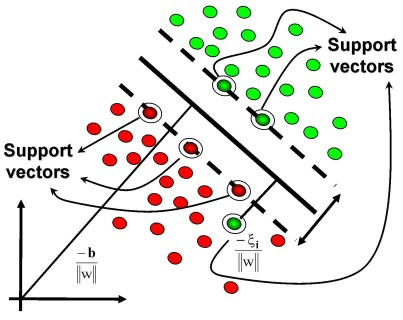

In [6]:
Image("local/imgs/SV.jpg", width = 400, height = 200)

### Kernels

Utilizar un producto punto diferente, significa aplicar una transformación del conjunto de características $k({\bf{x}}_n , {\bf{x}}_m) = \phi({\bf{x}}_n)^T\phi({\bf{x}}_m)$, sin necesidad de conocer la transformación $\phi(\cdot)$, únicamente el producto punto. El espacio al cual se mapean los datos puede ser de dimensión mayor que el original y es posible que clases traslapadas en el espacio original sean linealmente separables en el espacio transformado $\phi(\cdot)$.

Uno de los kernels más comúnmente usados es el Gaussiano, el cual está dado por:

$$k({\bf{x}}_n , {\bf{x}}_m) = \exp \left[ -\frac{\|{\bf{x}}_n - {\bf{x}}_m\|^2}{2\sigma^2} \right]$$

Pero existen muchos otros y existe también un conjunto de reglas que permiten definir nuevos kernels a partir de otros, por ejemplo usando operadores de suma y producto, entre otros (<b>Consultar</b>).

Recordemos lo que puede lograr una transformación no lineal:

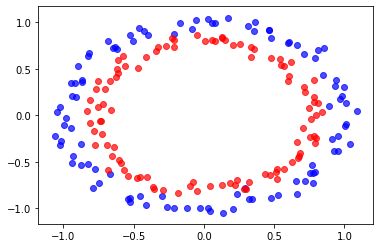

In [14]:
from sklearn.datasets import make_circles
X,y = make_circles(200, noise=.05)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue", alpha=.7)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="red",alpha=.7)

In [15]:
X,y = make_circles(300, noise=.05)
X = np.vstack((X.T,X[:,0]**2+X[:,1]**2)).T
X.shape

(300, 3)

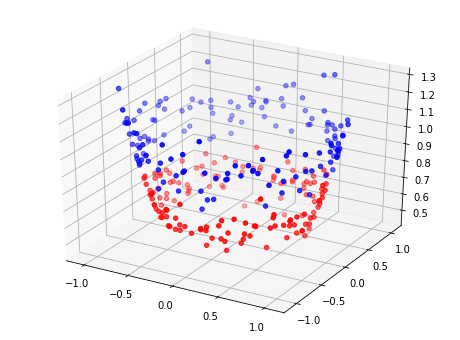

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0][y==0], X[:,1][y==0],X[:,2][y==0], color="blue")
ax.scatter(X[:,0][y==1], X[:,1][y==1],X[:,2][y==1], color="red")

----------------------------------------------------------------------------------------------------------------------------------------------

## Máquinas de Vectores de Soporte de Márgen suave

La formulación del modelo SVM hecho hasta ahora asume que las clases son separables, al menos en un espacio de alta dimensión. Sin embargo, las distribuciones de las clases pueden estar traslapadas y por consiguiente es necesario modificar la SVM para que permita que algunas muestras queden mal clasificadas. Lo que se hace entonces es permitir que las muestras se ubiquen en el lado incorrecto de la frontera pero aplicando una penalidad proporcional a la distancia a la frontera.

Se introducen en el modelo un conjunto de variables $\zeta_n \geq 0$, conocidas como variables de relajación. Una para cada muestra ${\bf{x}}_n$. $\zeta_n = 0$ para las muestras que se encuentran al lado correcto y $\zeta_n = |t_n - y({\bf{x}}_n)|$ para las demás. Un punto ubicado justo en la frontera tendrá $\zeta_n = 1$ y puntos con $\zeta_n \geq 1$ estarán mal clasificados. Por último, puntos con $0 \leq \zeta_n \leq 1$ caeran dentro del margen aunque en el lado correcto.

La restricción en este caso estará dada por:

$$t_n y({\bf{x}}_n) \geq 1 - \zeta_n$$

y la función objetivo se convierte en:

$$\min C \sum_{n=1}^N \zeta_n + \frac{1}{2}\|{\bf{w}}\|^2$$ sujeto a $\zeta_n \geq 0$

donde $C$ controla el compromiso entre la penalidad de la variable de relajación y el margen. A este modelo se le conoce como <b>Soft-margin SVM </b>.

$C$ se comporta como el inverso de un parámetro de regularización, $C \rightarrow \infty$ corresponde a la SVM original. La función de optimización completa se convierte en:

$$ {\mathcal L}({\bf{w}},b,{\bf{a}}) = \frac{1}{2}\|{\bf{w}}\|^2 + C\sum_{n=1}^N \zeta_n- \sum_{n=1}^{N} a_n \left\lbrace t_n ({\bf{w}}^T \phi({\bf{x}}_n) + b) - 1 + \zeta_n \right\rbrace - \sum_{n=1}^N \mu_n \zeta_n$$

donde $a_n \geq 0$, $\mu_n \geq 0$ son multiplicadores de Lagrange. Luego de realizar los procedimientos de derivación y reemplazo, similares a los del caso anterior se llegará a la función objetivo:

$$\tilde{\mathcal L}({\bf{a}}) = \sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m \phi({\bf{x}}_n)^T \phi({\bf{x}}_m)$$

Sujeto a $0 \leq a_n \leq C$, $\sum_{n=1}^N a_n t_n = 0$

Es posible entonces notar que la función objetivo es igual, únicamente cambió la restricción del proceso de optimización. Los vectores de soporte en este caso son aquellos puntos con $0 < a_n < C$.

La predicción de una nueva muestra se realiza nuevamente a partir de

$$y({\bf{x}}) = \sum_{n=1}^N a_n t_n k({\bf{x}},{\bf{x}}_n) + b$$

con

$$b = \frac{1}{N_{sv}} \sum_{n \in sv} \left(t_n - \sum_{m \in sv} a_m t_m k({\bf{x}}_n,{\bf{x}}_m) \right)$$

Que corresponden a las mismas expresiones de antes. Aunque es necesario tener en cuenta que la definición de los vectores de soporte en este caso es un poco diferente, debido precisamente al cambio en la restricción de la función objetivo.

----------------------------------------------------------------------------------------------------------------------------------------------

Veamos algunos ejemplos prácticos utilizando la librería scikit-learn para python.

Creamos el conjunto artifical de datos

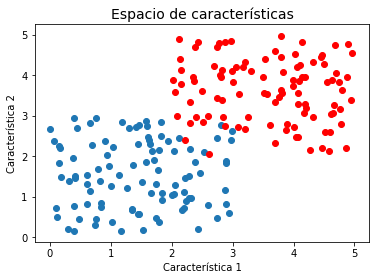

In [7]:
from sklearn import svm
x1 = 3*np.random.rand(2,100)
x2 = 3*np.random.rand(2,100) + 2
plt.title(u'Espacio de características', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.scatter(x1[0,:], x1[1,:])
plt.scatter(x2[0,:], x2[1,:],color='red')
plt.show()

Definimos el kernel y entrenamos la SVM

In [8]:
X = np.concatenate((x1.T,x2.T),axis=0)
y = np.concatenate((np.ones((100,1)),np.zeros((100,1))),axis=0)
y = np.ravel(y)
svc = svm.SVC(kernel='linear')
svc.fit(X, y)

SVC(kernel='linear')

Veamos la frontera de decisión y los vectores de soporte

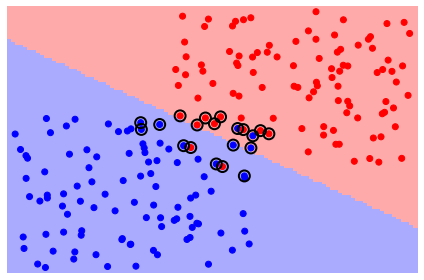

In [9]:
plt = sv.plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], 
           svc.support_vectors_[:, 1], 
           s=120,
           facecolors='none',
           edgecolors='black', 
           linewidths=2,
           zorder=10)
plt.show()

Veamos el efecto de $C$

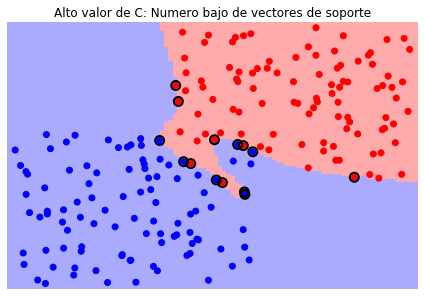

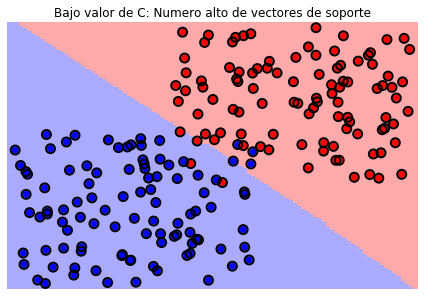

In [10]:
svc = svm.SVC(kernel='rbf', C=1e6)
plt = sv.plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, 
            facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Alto valor de C: Numero bajo de vectores de soporte')

svc = svm.SVC(kernel='rbf', C=1e-2)
plt = sv.plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, 
            facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Bajo valor de C: Numero alto de vectores de soporte')
plt.show()

Veamos ahora el efecto de la función kernel, en este caso la librería scikit-learn, como la mayoría de librerías de este tipo, trae varias funciones kernels que se pueden escoger e incluso se puede crear una función kernel particular y pasarla como argumento.

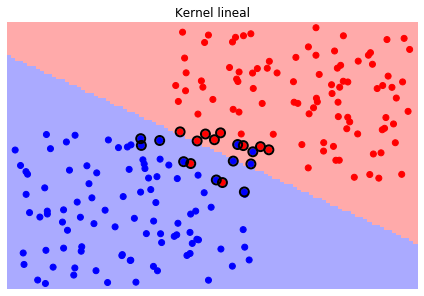

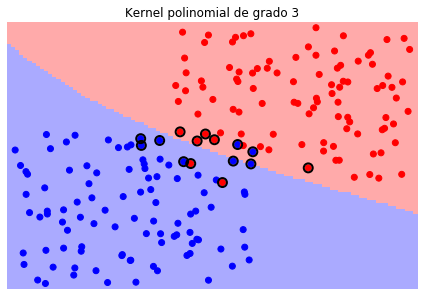

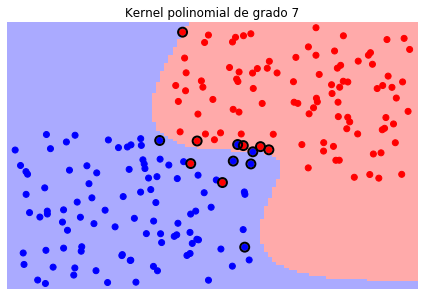

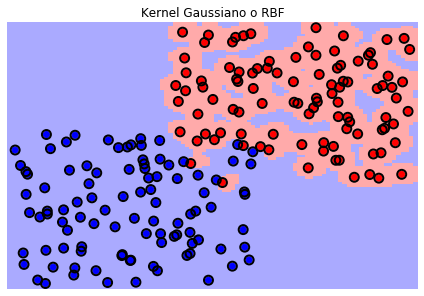

In [11]:
svc_lin = svm.SVC(kernel='linear')
sv.plot_estimator(svc_lin, X, y)
plt.scatter(svc_lin.support_vectors_[:, 0], svc_lin.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel lineal')

svc_poly = svm.SVC(kernel='poly', degree=3)
sv.plot_estimator(svc_poly, X, y)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 3')

svc_poly = svm.SVC(kernel='poly', degree=7)
sv.plot_estimator(svc_poly, X, y)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 7')

svc_rbf = svm.SVC(kernel='rbf', gamma=1e2)
sv.plot_estimator(svc_rbf, X, y)
plt.scatter(svc_rbf.support_vectors_[:, 0], svc_rbf.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel Gaussiano o RBF')
plt.show()

Es necesario tener en cuenta que durante el proceso de entrenamiento tendremos entonces que definir el valor del parámetro $C$ y el o los parámetros del kernel que seleccionemos.

# Regresión por vectores de soporte

El modelo de SVM descrito hasta el momento, puede ser extendido para resolver problemas de Regresión. En este caso, en lugar de minimizar una función de error cuadrático medio regularizada, es decir:

$$ \frac{1}{2N} \sum_{n=1}^N (y_n - t_n )^2 + \frac{\lambda}{2}\|{\bf{w}}\|^2$$

Se reemplaza por una función de error $\epsilon$-insensitiva:

$$ \begin{align}
E_\epsilon(y({\bf{x}})-t) =
\begin{cases}
0  & \textrm{if} \;\; |y({\bf{x}}) - t| < \epsilon; \\
|y({\bf{x}}) - t| - \epsilon & \text{en otro caso} \\
\end{cases}.
\end{align} $$

Por consiguiente la función regularizada que se minimiza está dada por:

$$C\sum_{n=1}^N E_{\epsilon}(y({\bf{x}}_n) - t_n) + \frac{1}{2}\|\bf{w}\|^2$$

donde $y({\bf{x}}_n) = {\bf{w}}^T \phi({\bf{x}}_n) + b$. Al igual que en el caso anterior, para permitir que algunas muestras caigan por fuera de la región deseada ($\epsilon$-tubo), se introducen variables de relajación. Sin embargo, en este caso es necesario introducir dos tipos de variables:

$$t_n \leq y({\bf{x}}_n) + \epsilon + \xi_n^{+}$$

$$t_n \geq y({\bf{x}}_n) - \epsilon - \xi_n^{-}$$

<img src="local/imgs/SVR1.png" alt="SVR_Regression" width="500"/>

Cada muestra ${\bf{x}}_n$ debe garantizar las dos condiciones. Por consiguiente, la función de error para el modelo de regresión por vectores de soporte se puede expresar como:

$$C\sum_{n=1}^{N}(\xi_n^{+} + \xi_n^{-}) + \frac{1}{2}\|{\bf{w}}\|^2$$

La cual debe ser minimizada sujeto a las restricciones anteriores y a $\xi_n^{+} \geq 0$ y $\xi_n^{-} \geq 0$. 

Para llevar a cabo el proceso de optimización con restricciones, se define la siguiente función objetivo a partir de los multiplicadores de Lagrange $a_n^{+}$, $a_n^{-}$, $\mu_n^{+}$ y $\mu_n^{-}$:

$$L=C\sum_{n=1}^N (\xi_n^{+} + \xi_n^{-}) + \frac{1}{2}\|{\bf{w}}\|^2 - \sum_{n=1}^N (\mu_n^{+} \xi_n^{+} + \mu_n^{-}\xi_n^{-}) - \sum_{n=1}^N a_n^{+} (\epsilon + \xi_n^{+} + y({\bf{x}}_n) - t_n) - \sum_{n=1}^N a_n^{-}(\epsilon + \xi_n^{-} - y({\bf{x}}_n) + t_n)$$

Derivando con respecto a $\bf{w}$, $b$, $\xi_n^{+}$ y $\xi_n^{-}$, e igualando a cero se obtiene:

$$\frac{\partial L}{\partial {\bf{w}}} = 0 \Rightarrow {\bf{w}} = \sum_{n=1}^{N} (a_n^{+} - a_n^{-})\phi({\bf{x}}_n)$$

$$\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{n=1}^{N} (a_n^{+} - a_n^{-}) = 0$$

$$\frac{\partial L}{\partial \xi_n^{+}} = 0 \Rightarrow (a_n^{+} - \mu_n^{+})=C$$

$$\frac{\partial L}{\partial \xi_n^{-}} = 0 \Rightarrow (a_n^{-} - \mu_n^{-})=C$$

Si al igual que se hizo para las SVM, se reemplazan los resultados anteriores en la función $L$, la representación dual en este caso está dada por [1]:

$$L({\bf{a}}^{+},{\bf{a}}^{-}) = -\frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N (a_n^{+} - a_n^{-})(a_m^{+} - a_m ^{-})k({\bf{x}}_n ,{\bf{x}}_m) - \epsilon\sum_{n=1}^N (a_n^{+} + a_n^{-}) + \sum_{n=1}^N (a_n^{+} - a_n^{-})t_n$$

Una vez más, teniendo en cuenta las derivadas con respecto a $\xi_n^{+}$ y $\xi_n^{-}$, y que ambas variables deben ser mayores o iguales a cero, se requiere que:

$$ 0 \leq a_n^{+} \leq C$$

$$ 0 \leq a_n^{-} \leq C$$

El resultado del proceso de optimización permitirá establecer las muestras que caen en el límite del $\epsilon$-tubo o fuera de él y las caen dentro. Se entiende que una muestra no puede estar al mismo tiempo por arriba y por debajo de la función objetivo, por lo que para cada muestra $a_n^{+}$, $a_n^{-}$ o ambos, deben ser cero. 

La función a la salida se puede expresar como:

$$y({\bf{x}}) = \sum_{n=1}^{N_{sv}} (a_n^{+} - a_n^{-})k({\bf{x}}, {\bf{x}}_n) + b$$

El parametro $b$ puede ser calculado al reemplazar un vector de soporte en la ecuación anterior y garantizar que está fuera del $\epsilon$-tubo, es decir:

$$b = t_n - \epsilon - {\bf{w}}^T \phi({\bf{x}})$$

$$b = t_n - \epsilon - \sum_{m=1}^{N_{sv}} (a_m^{+} - a_m^{-})k({\bf{x}}_n, {\bf{x}}_m)$$

Al igual que en el caso de las SVM, en la práctica es mejor promediar el resultado para los diferentes vectores de soporte.

Veamos algunos ejemplos prácticos del uso de SVR.

<module 'matplotlib.pyplot' from '/home/julian/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

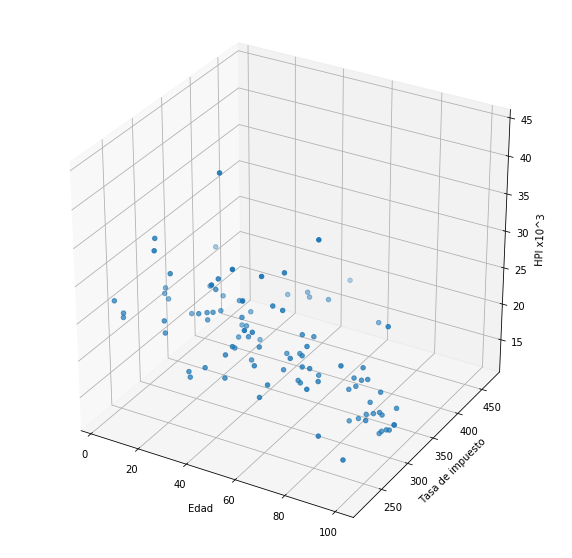

In [1]:
import local.lib.plotHPI as plothpi

plothpi.plot_hpi()

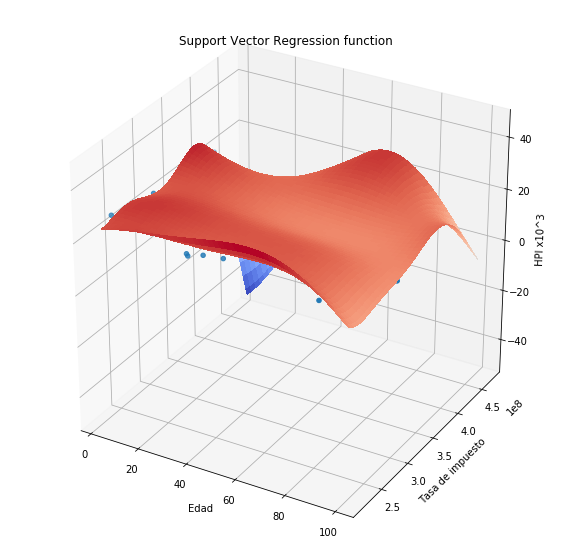

In [6]:
plothpi.SVRPlot_n(C=1e5,gamma=0.1)

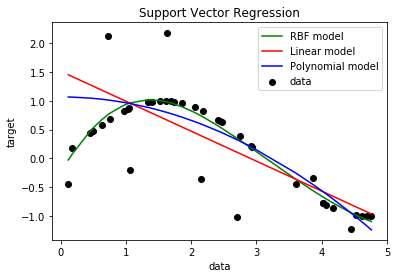

In [12]:
from sklearn.svm import SVR
###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
sv.PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

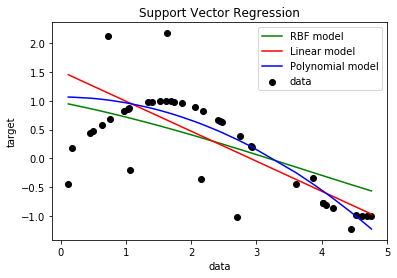

In [13]:
###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.01)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
###############################################################################
# look at the results
sv.PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

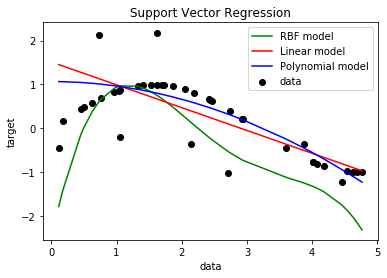

In [14]:
###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e7, gamma=0.01)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
sv.PlotEjemploSVR(X,y,y_rbf,y_lin,y_poly)

La siguiente figura muestra un ejemplo de función de regresión que puede ser obtenida usando una SVR con kernel RBF. Imagen tomada de: https://basilio.dev/screenshots.html

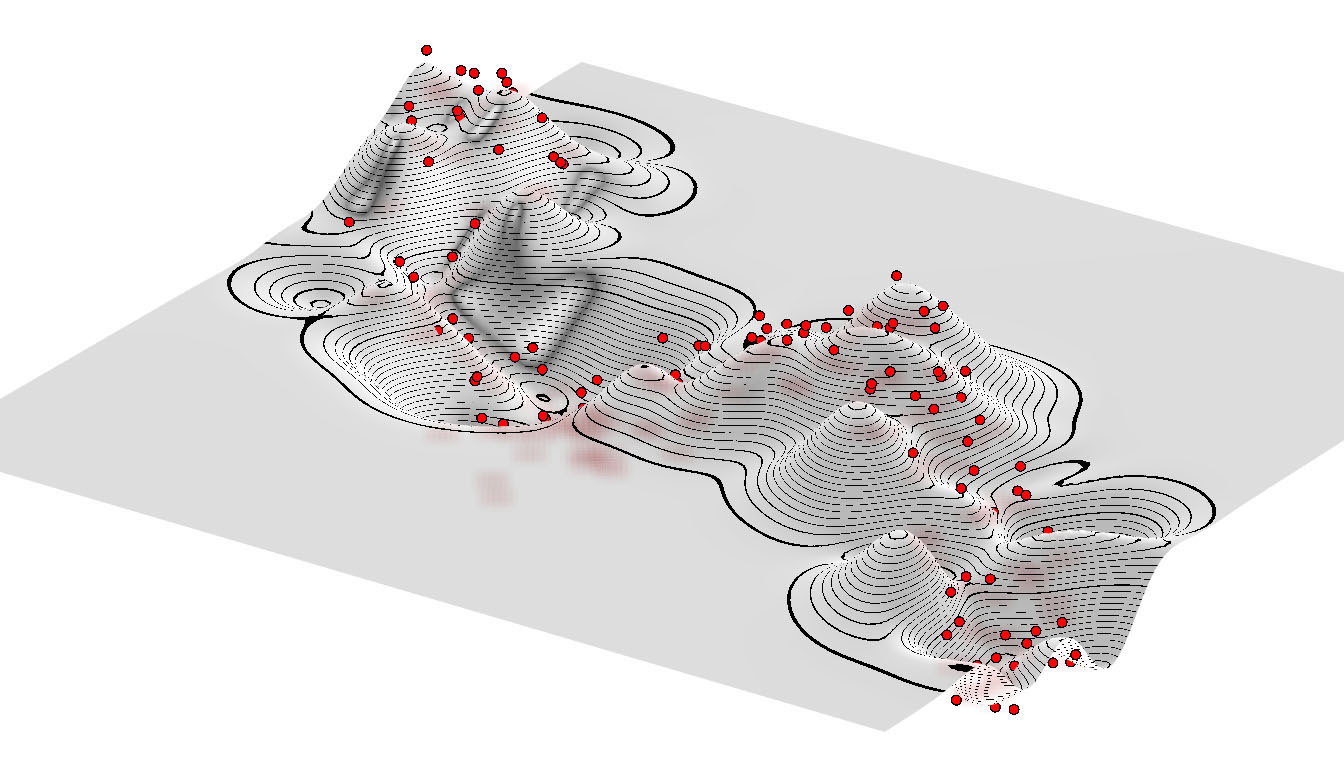

In [15]:
Image("local/imgs/SVR.jpg", width = 400, height = 200)

#### Bibliografy